In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Prepare original dataset

`df_raw` $\rightarrow$ `df_dataset`

#### Read data from file and prepare *DataFrame*

In [2]:
def add_Healthy_column(df):
    """
    Adds an extra column to indicate if a person is healthy or not.
    A person is classified as healthy if they have no 'hypertension' or 'diabetes mellitus'.
    """
    df_extended = df.copy()
    
    df_extended['Healthy'] = df_extended.apply(
        lambda row: 'Yes' if row['Hypertension'] == 'No' and row['Diabetes mellitus'] == 'No' else 'No',
        axis=1
    )
    return df_extended


def add_BMI_column(df):
    """
    Adds an extra column 'BMI' determined from 'Height' and 'Weight'
    and rounded to one significant figure
    """
    df_extended = df.copy()
    
    df_extended['BMI'] = df_extended['Weight'] / (df['Height']/100)**2
    df_extended['BMI'] = df_extended['BMI'].apply(lambda value: round(value, 1))
    
    return df_extended

In [3]:
df_raw = pd.read_excel('dataset_KES_2024.xlsx')

df_dataset = (
    df_raw.
    pipe(add_Healthy_column).
    pipe(add_BMI_column)
)
df_dataset.sample(4)

Height  Weight  LDL cholesterol  HDL cholesterol  Total cholesterol  \
359     185   104.0              102               35                173   
80      156    72.0               43               24                 93   
460     160   100.0              109               46                180   
353     154    70.0              105               38                157   

     CRP ultrasensitive  Age  Gender Hypertension Diabetes mellitus Healthy  \
359                1.13   62    Male          Yes                No      No   
80                21.54   89  Female          Yes               Yes      No   
460                3.23   70  Female          Yes               Yes      No   
353               54.31   82  Female          Yes                No      No   

      BMI  
359  30.4  
80   29.6  
460  39.1  
353  29.5

In [4]:
import ctgan

In [5]:
discrete_columns = [
    'Gender',
    'Hypertension',
    'Diabetes mellitus',
    'Healthy'
]

In [6]:
ct = ctgan.CTGAN(epochs=200)
ct.fit(df_dataset, discrete_columns)

In [7]:
synthetic_data = ct.sample(len(df_dataset))

In [8]:
def round_to_2sd(df, columns):

    df_new = df.copy()
    for col in columns:
        df_new[col] = df_new[col].apply(lambda value: round(value, 2))
    
    return df_new


def round_to_1sd(df, columns):

    df_new = df.copy()
    for col in columns:
        df_new[col] = df_new[col].apply(lambda value: round(value, 1))
    
    return df_new


df_synthetic = (
    synthetic_data.
    pipe(round_to_2sd, columns=['CRP ultrasensitive']).
    pipe(round_to_1sd, columns=['BMI'])
)

df_synthetic.sample(4)

Height     Weight  LDL cholesterol  HDL cholesterol  Total cholesterol  \
86      168  40.547612              114               51                161   
194     174  24.279307               66               57                150   
558     168  65.708032               93               67                197   
305     184  45.697415               53               27                186   

     CRP ultrasensitive  Age  Gender Hypertension Diabetes mellitus Healthy  \
86                -5.72   36  Female           No               Yes     Yes   
194               -3.13   40  Female          Yes                No     Yes   
558               -4.86   76  Female          Yes                No      No   
305                1.19   70    Male          Yes               Yes      No   

      BMI  
86   19.0  
194  24.7  
558  22.6  
305  22.4

C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

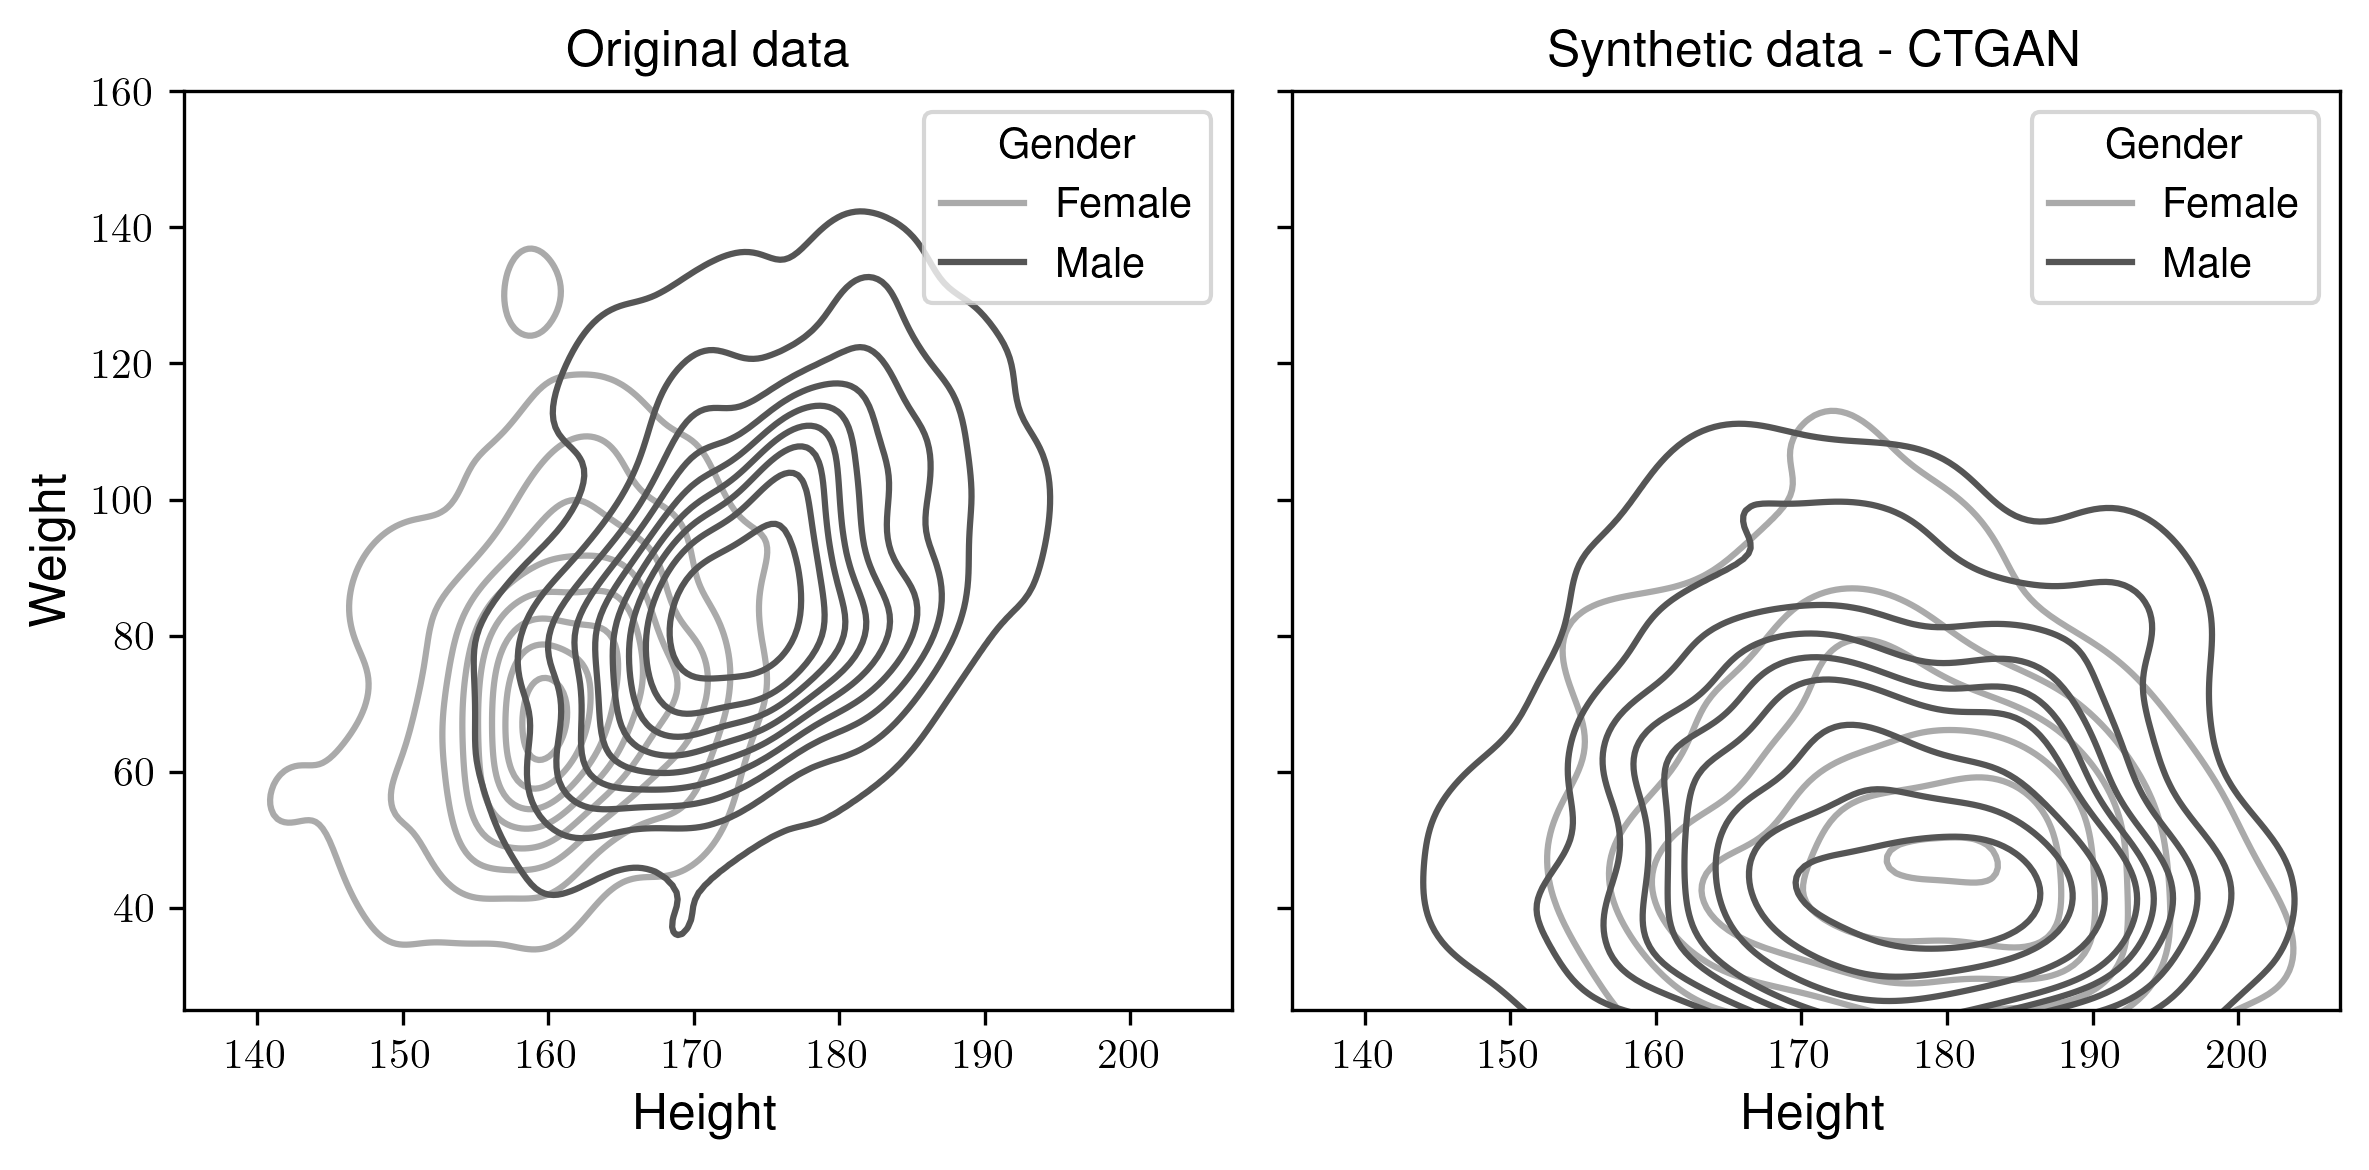

In [9]:
cmaps = ['binary', 'YlOrBr']
palette = cmaps[0]

colX, colY, hue = 'Height', 'Weight', 'Gender'
fig, ax = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
sns.kdeplot(data=df_dataset, x=colX, y=colY, hue=hue, palette=palette, ax=ax[0]);
ax[0].set_title('Original data', fontsize=12)
ax[0].set_xlabel(colX, fontsize=12)
ax[0].set_ylabel(colY, fontsize=12)
ax[0].set_xlim([135, 207])
ax[0].set_ylim([25, 160])
sns.kdeplot(data=df_synthetic, x=colX, y=colY, hue=hue, palette=palette);
ax[1].set_title('Synthetic data - CTGAN', fontsize=12)
ax[1].set_xlabel(colX, fontsize=12)
ax[1].set_ylabel(colY, fontsize=12)
plt.tight_layout()
plt.savefig(
    f'images/4_Gender_dist_CTGAN.png',
    dpi=300,
    bbox_inches = 'tight',
)
plt.show()

C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

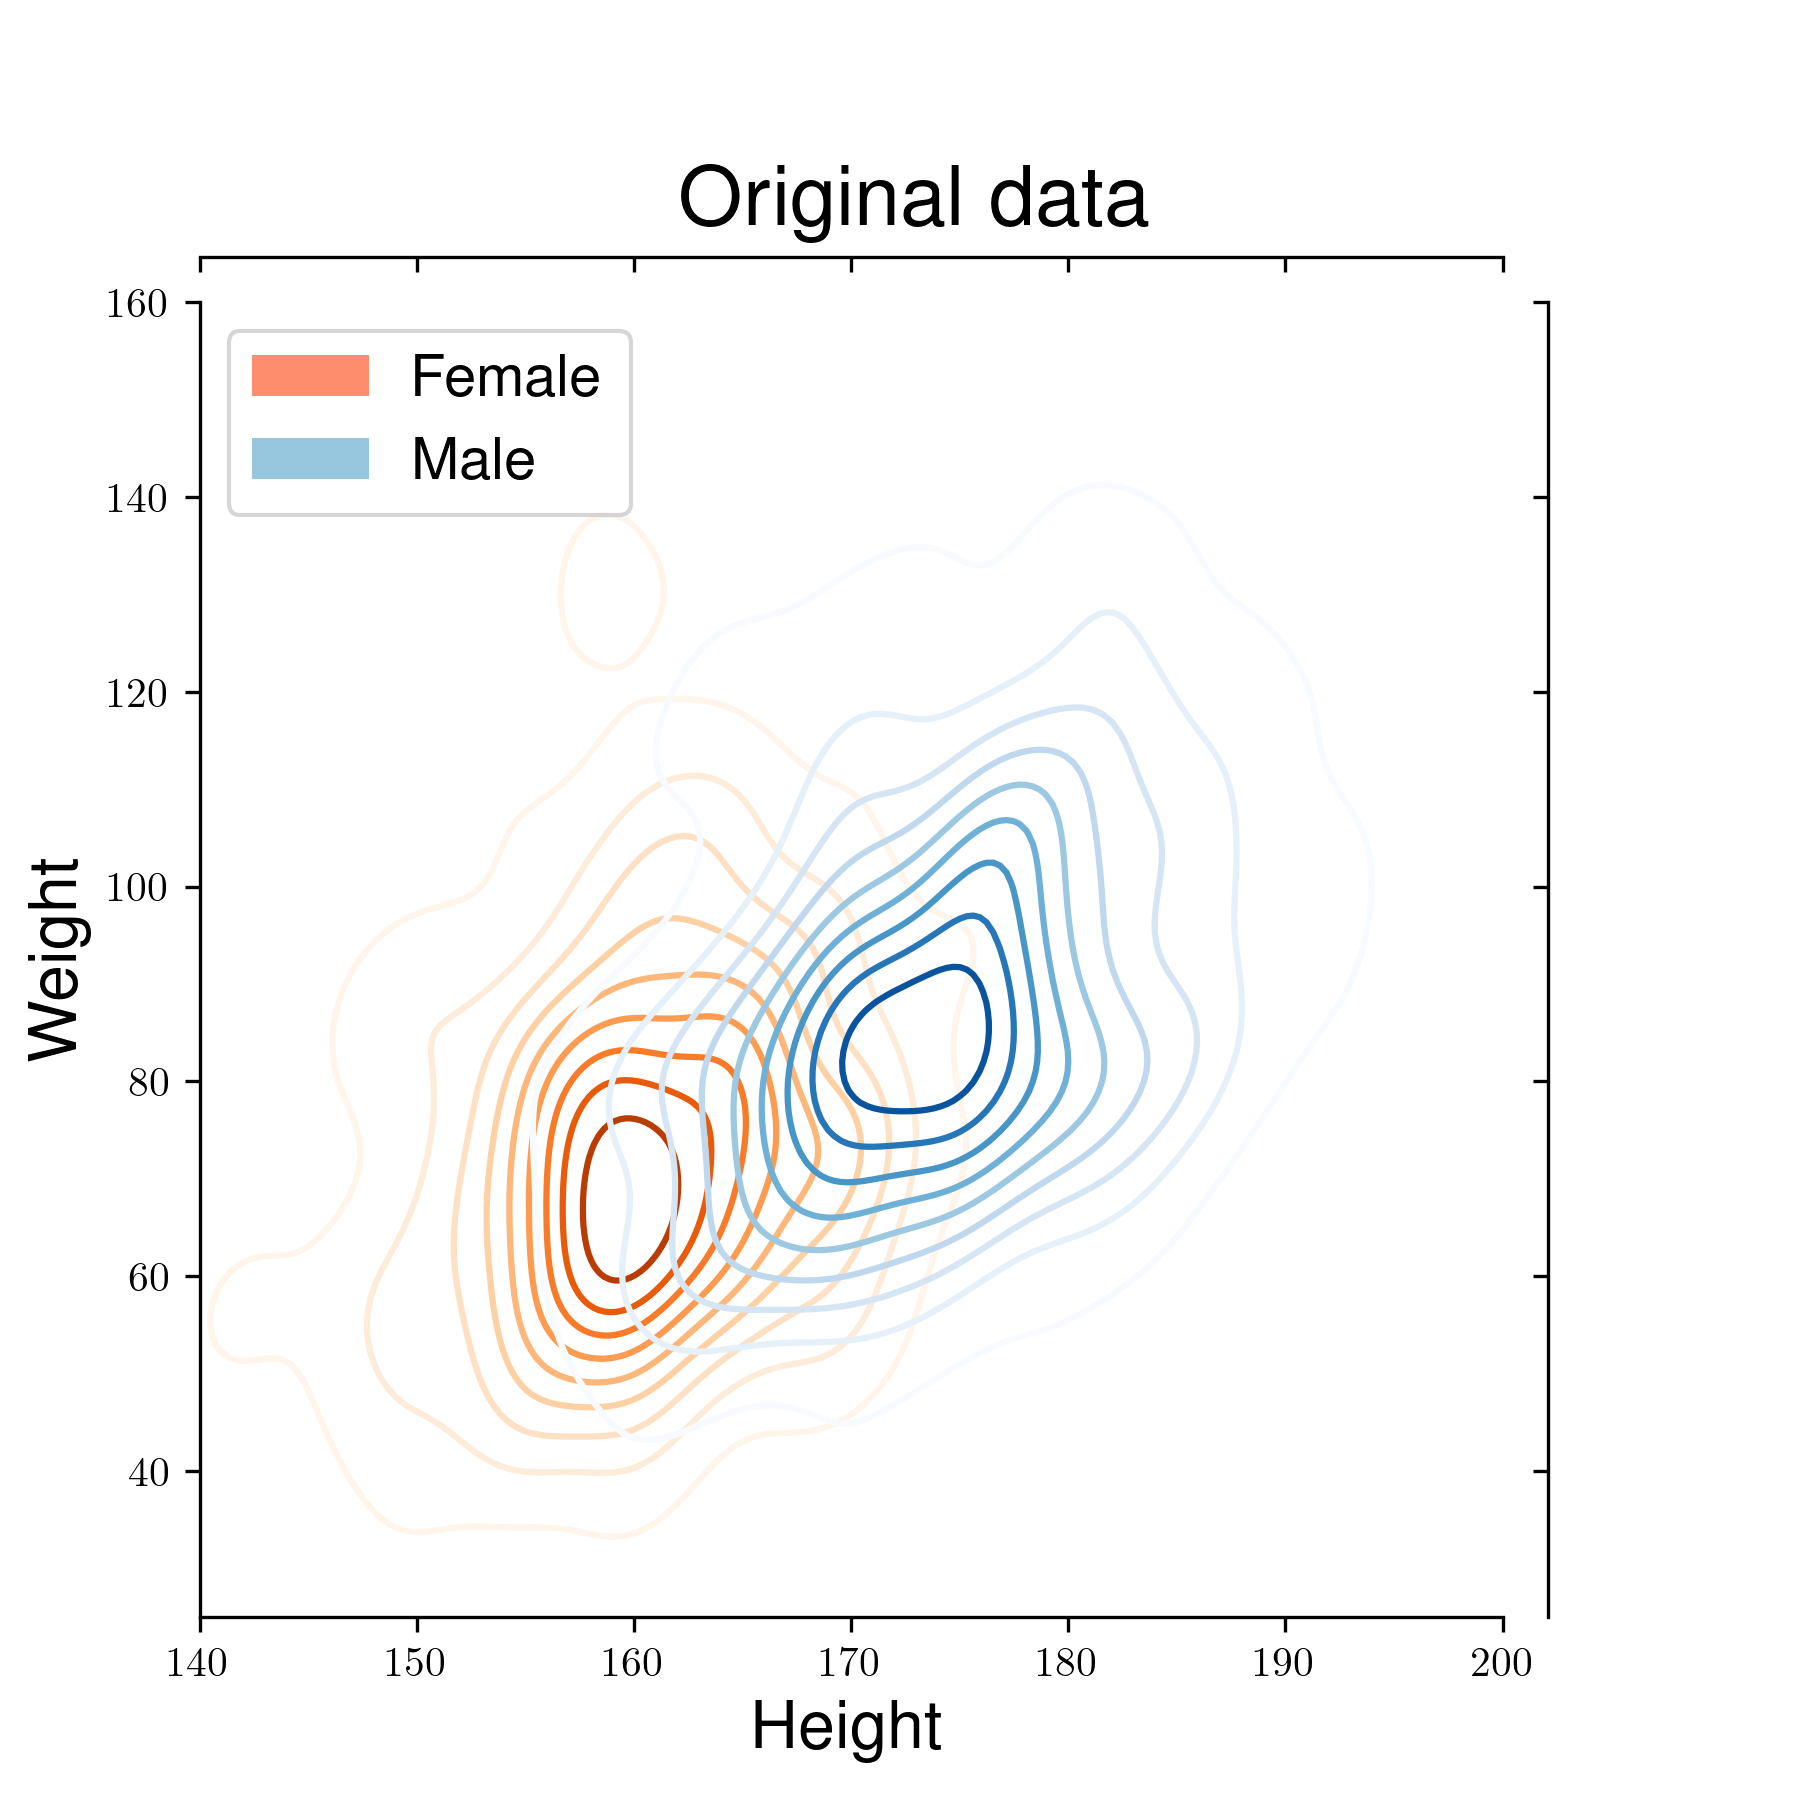

C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaroslawdrapala\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

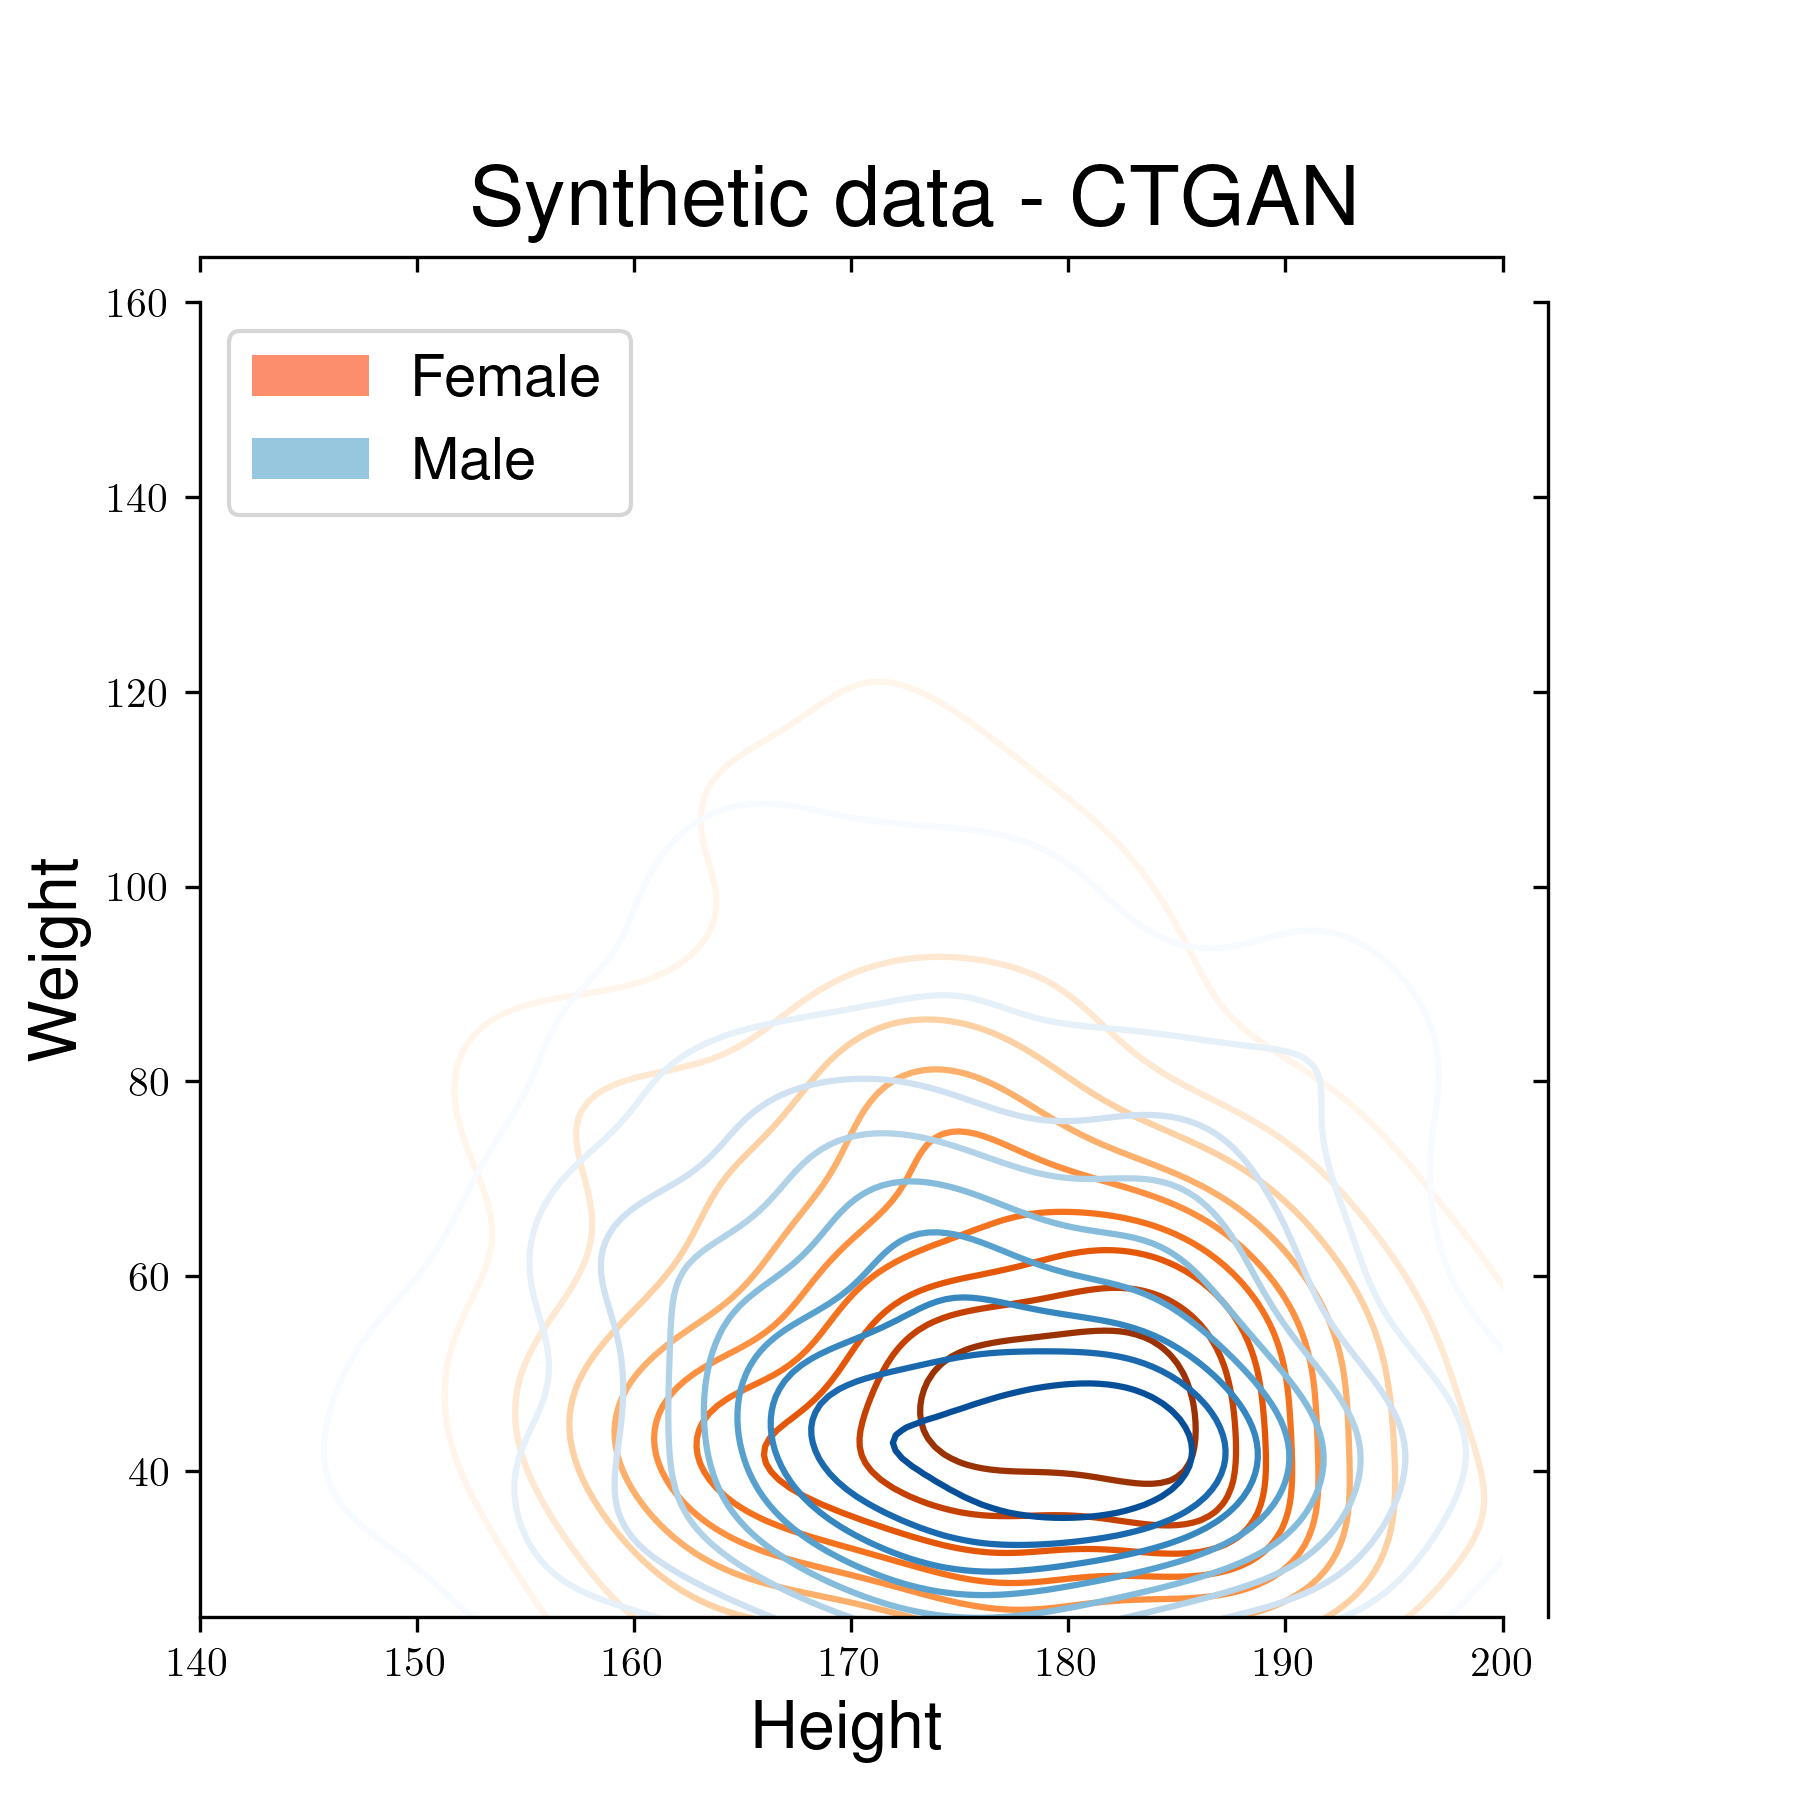

In [10]:
import matplotlib.patches as mpatches

colX, colY, hue = 'Height', 'Weight', 'Gender'
g = sns.JointGrid(x=colX, y=colY, data=df_dataset)
w=sns.kdeplot(data=df_dataset[df_dataset[hue] == 'Female'], x=colX, y=colY,
            label='Female',
            #hue=hue,
            #palette=['tab:orange', 'tab:blue'],
            cmap="Oranges",
            #ax=ax[0]
            ax=g.ax_joint
           );
sns.kdeplot(data=df_dataset[df_dataset[hue] == 'Male'], x=colX, y=colY,
            label='Male',
            #hue=hue,
            #palette=['tab:orange', 'tab:blue'],
            cmap="Blues",
            ax=g.ax_joint
           );
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Female"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Male")]
plt.legend(handles=handles, loc="upper left", bbox_to_anchor=([-6,1]), fontsize=14)
w.set_xlabel(colX, fontsize=16)
w.set_ylabel(colY, fontsize=16)
w.set_xlim([140, 200])
w.set_ylim([25, 160])
g.fig.suptitle("Original data", y=0.9, fontsize=20)
plt.savefig(
    f'images/4a_Gender_dist_CTGAN.png',
    dpi=300,
    bbox_inches = 'tight'
)
plt.show()



colX, colY, hue = 'Height', 'Weight', 'Gender'
g = sns.JointGrid(x=colX, y=colY, data=df_dataset)
w=sns.kdeplot(data=df_synthetic[df_synthetic[hue] == 'Female'], x=colX, y=colY,
            label='Female',
            #hue=hue,
            #palette=['tab:orange', 'tab:blue'],
            cmap="Oranges",
            #ax=ax[0]
            ax=g.ax_joint
           );
sns.kdeplot(data=df_synthetic[df_synthetic[hue] == 'Male'], x=colX, y=colY,
            label='Male',
            #hue=hue,
            #palette=['tab:orange', 'tab:blue'],
            cmap="Blues",
            ax=g.ax_joint
           );
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Female"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Male")]
plt.legend(handles=handles, loc="upper left", bbox_to_anchor=([-6,1]), fontsize=14)
w.set_xlabel(colX, fontsize=16)
w.set_ylabel(colY, fontsize=16)
w.set_xlim([140, 200])
w.set_ylim([25, 160])
g.fig.suptitle("Synthetic data - CTGAN", y=0.9, fontsize=20)
plt.savefig(
    f'images/4b_Gender_dist_CTGAN.png',
    dpi=300,
    bbox_inches = 'tight'
)
plt.show()

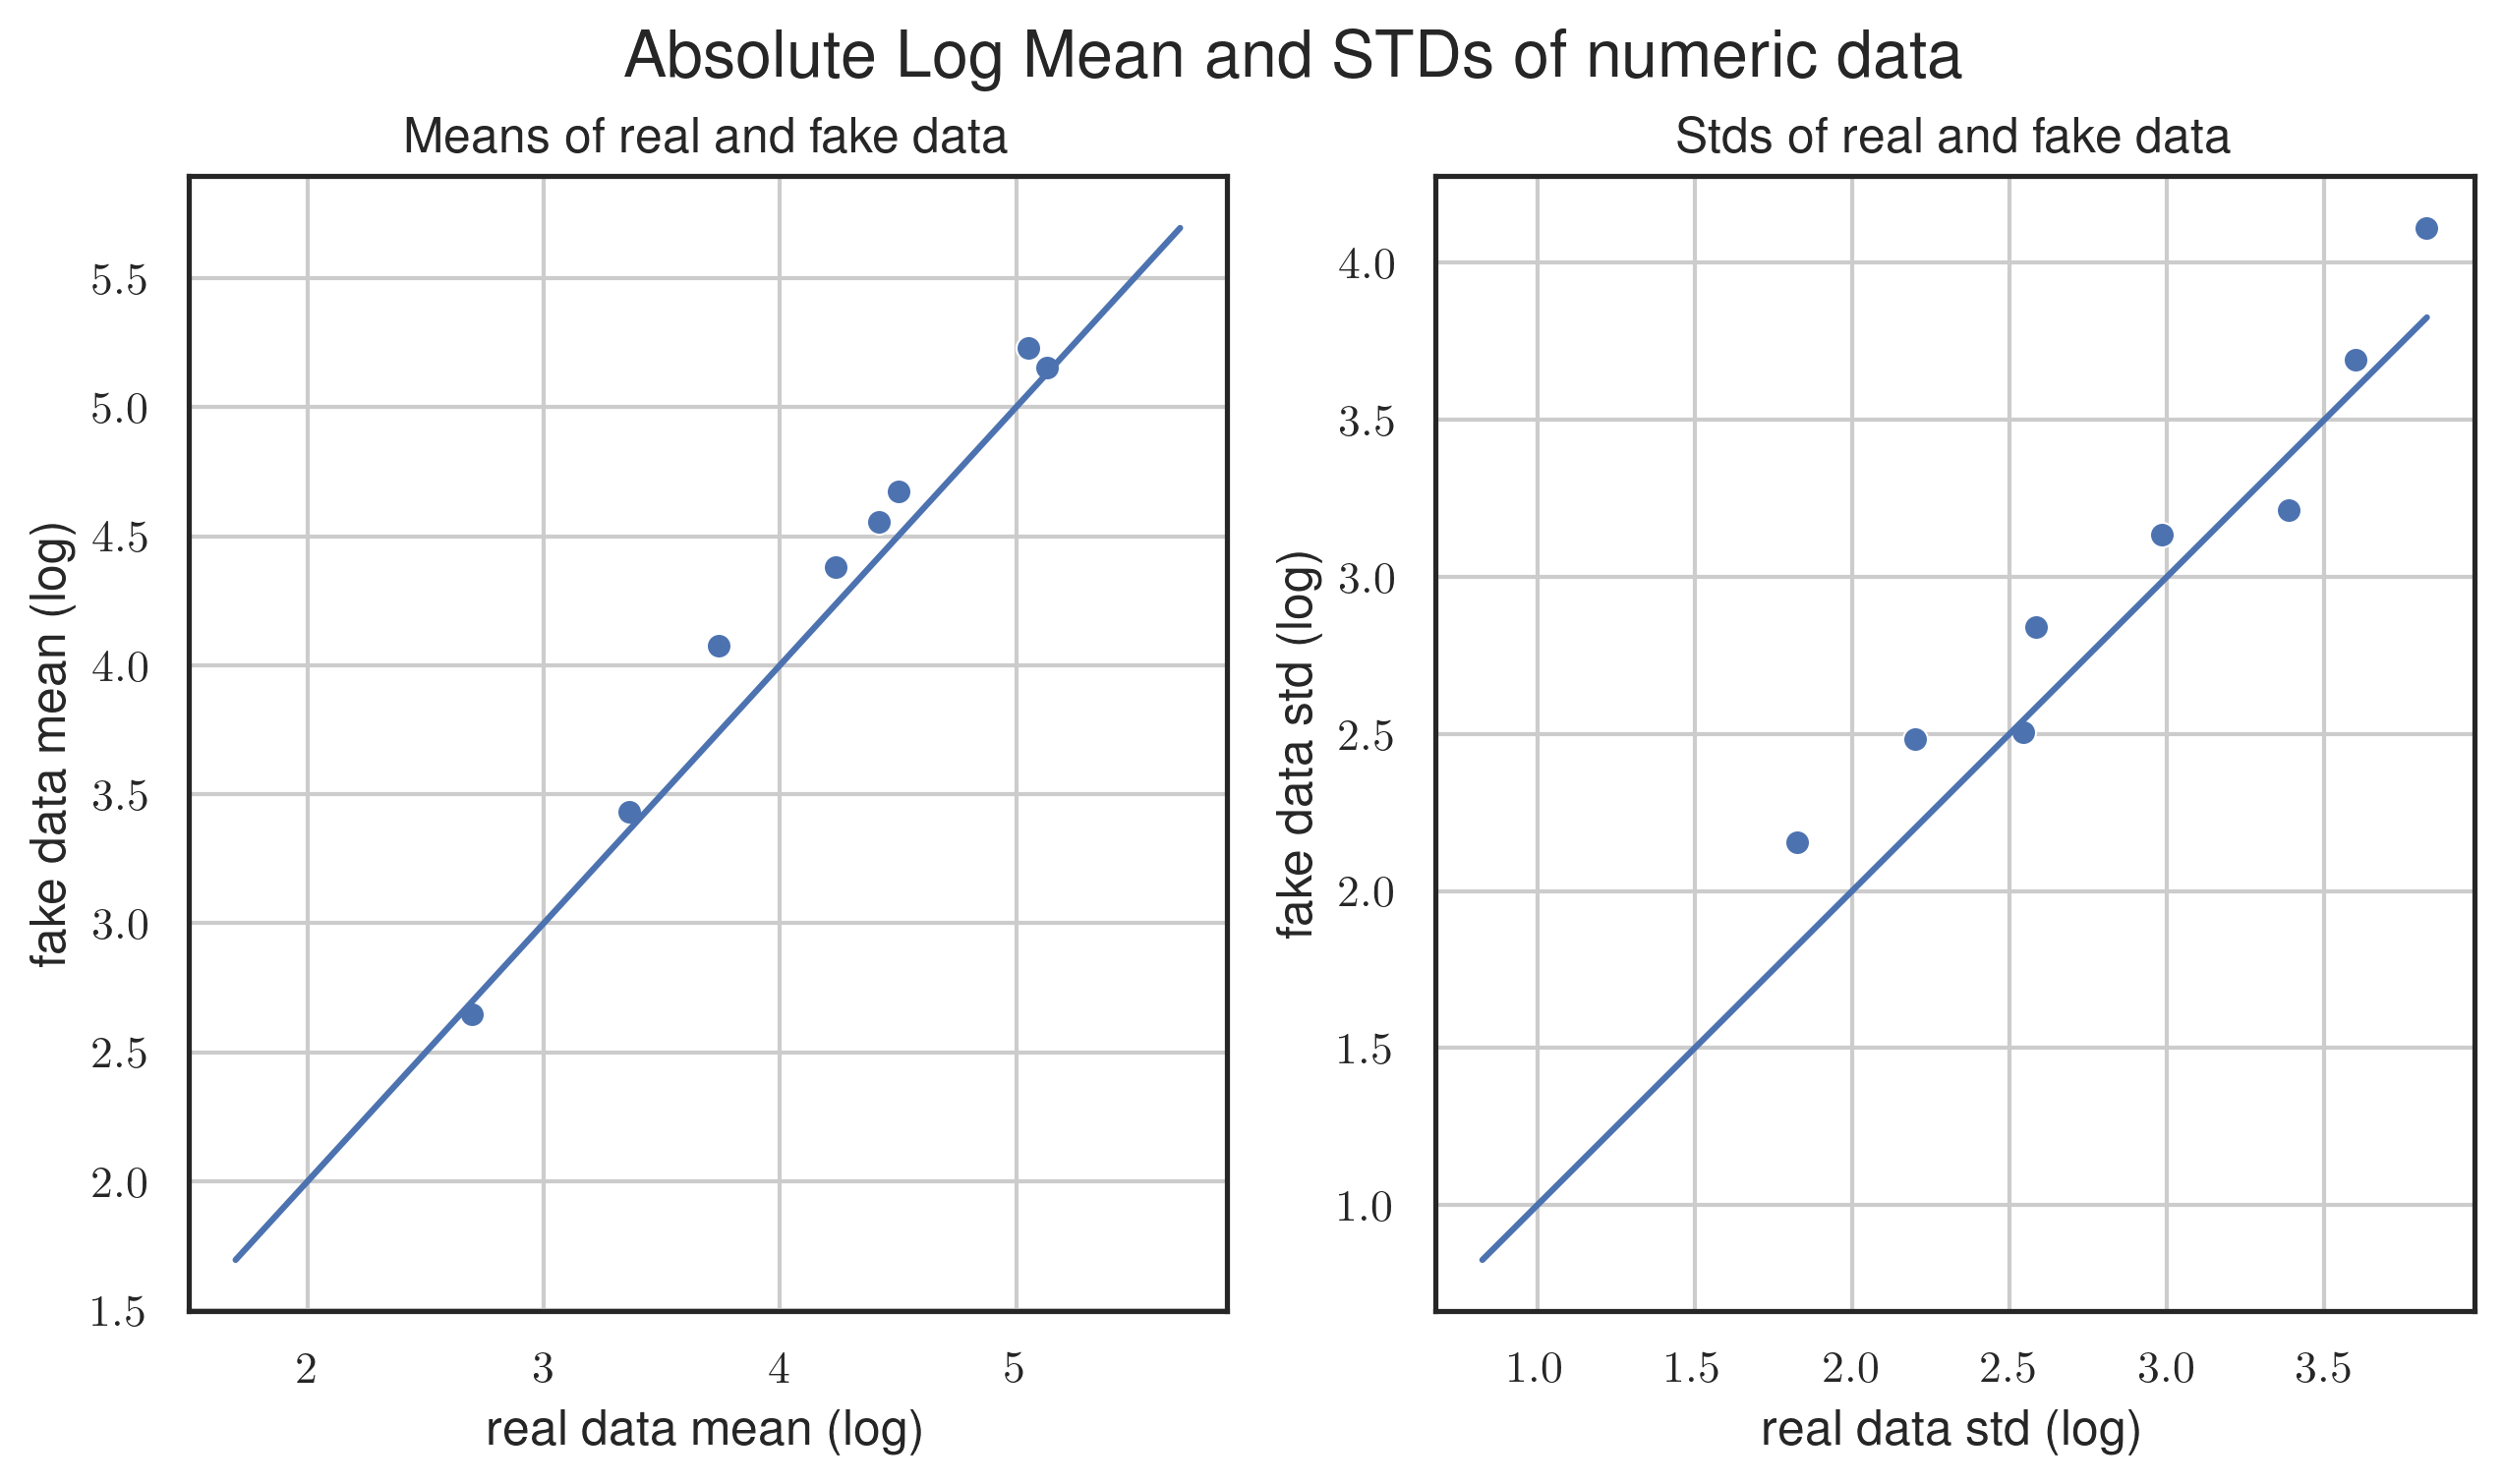

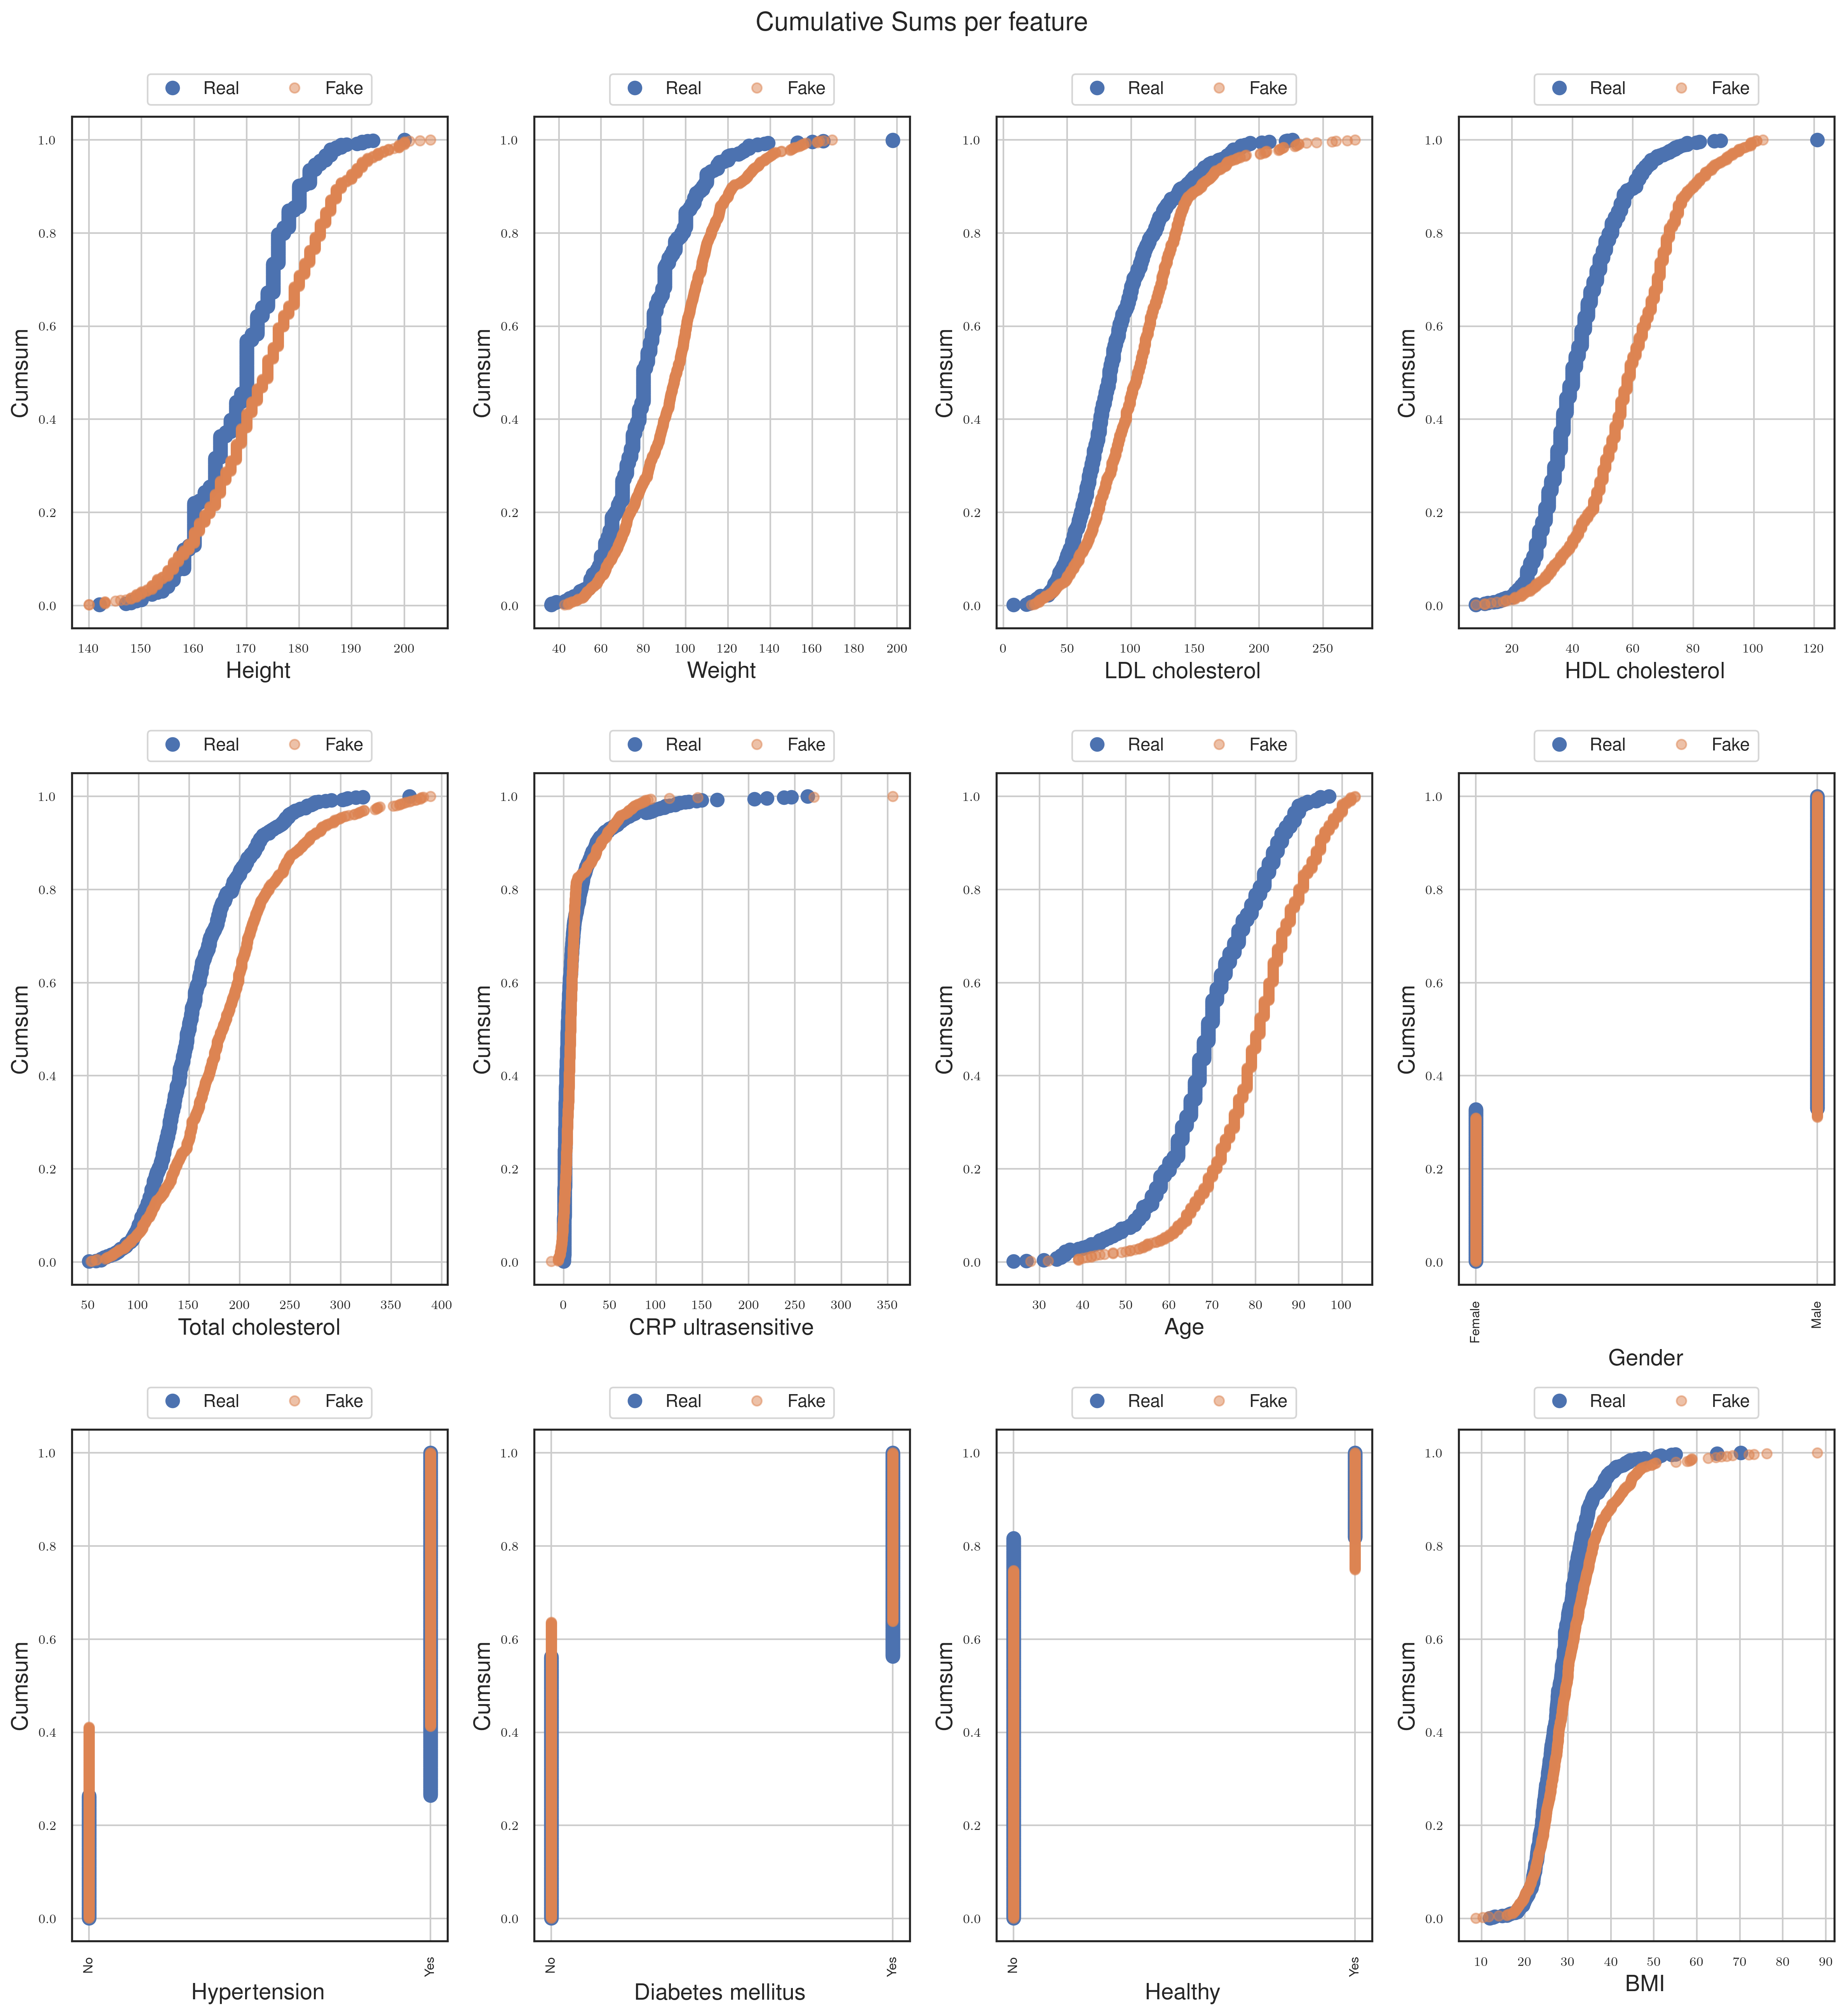

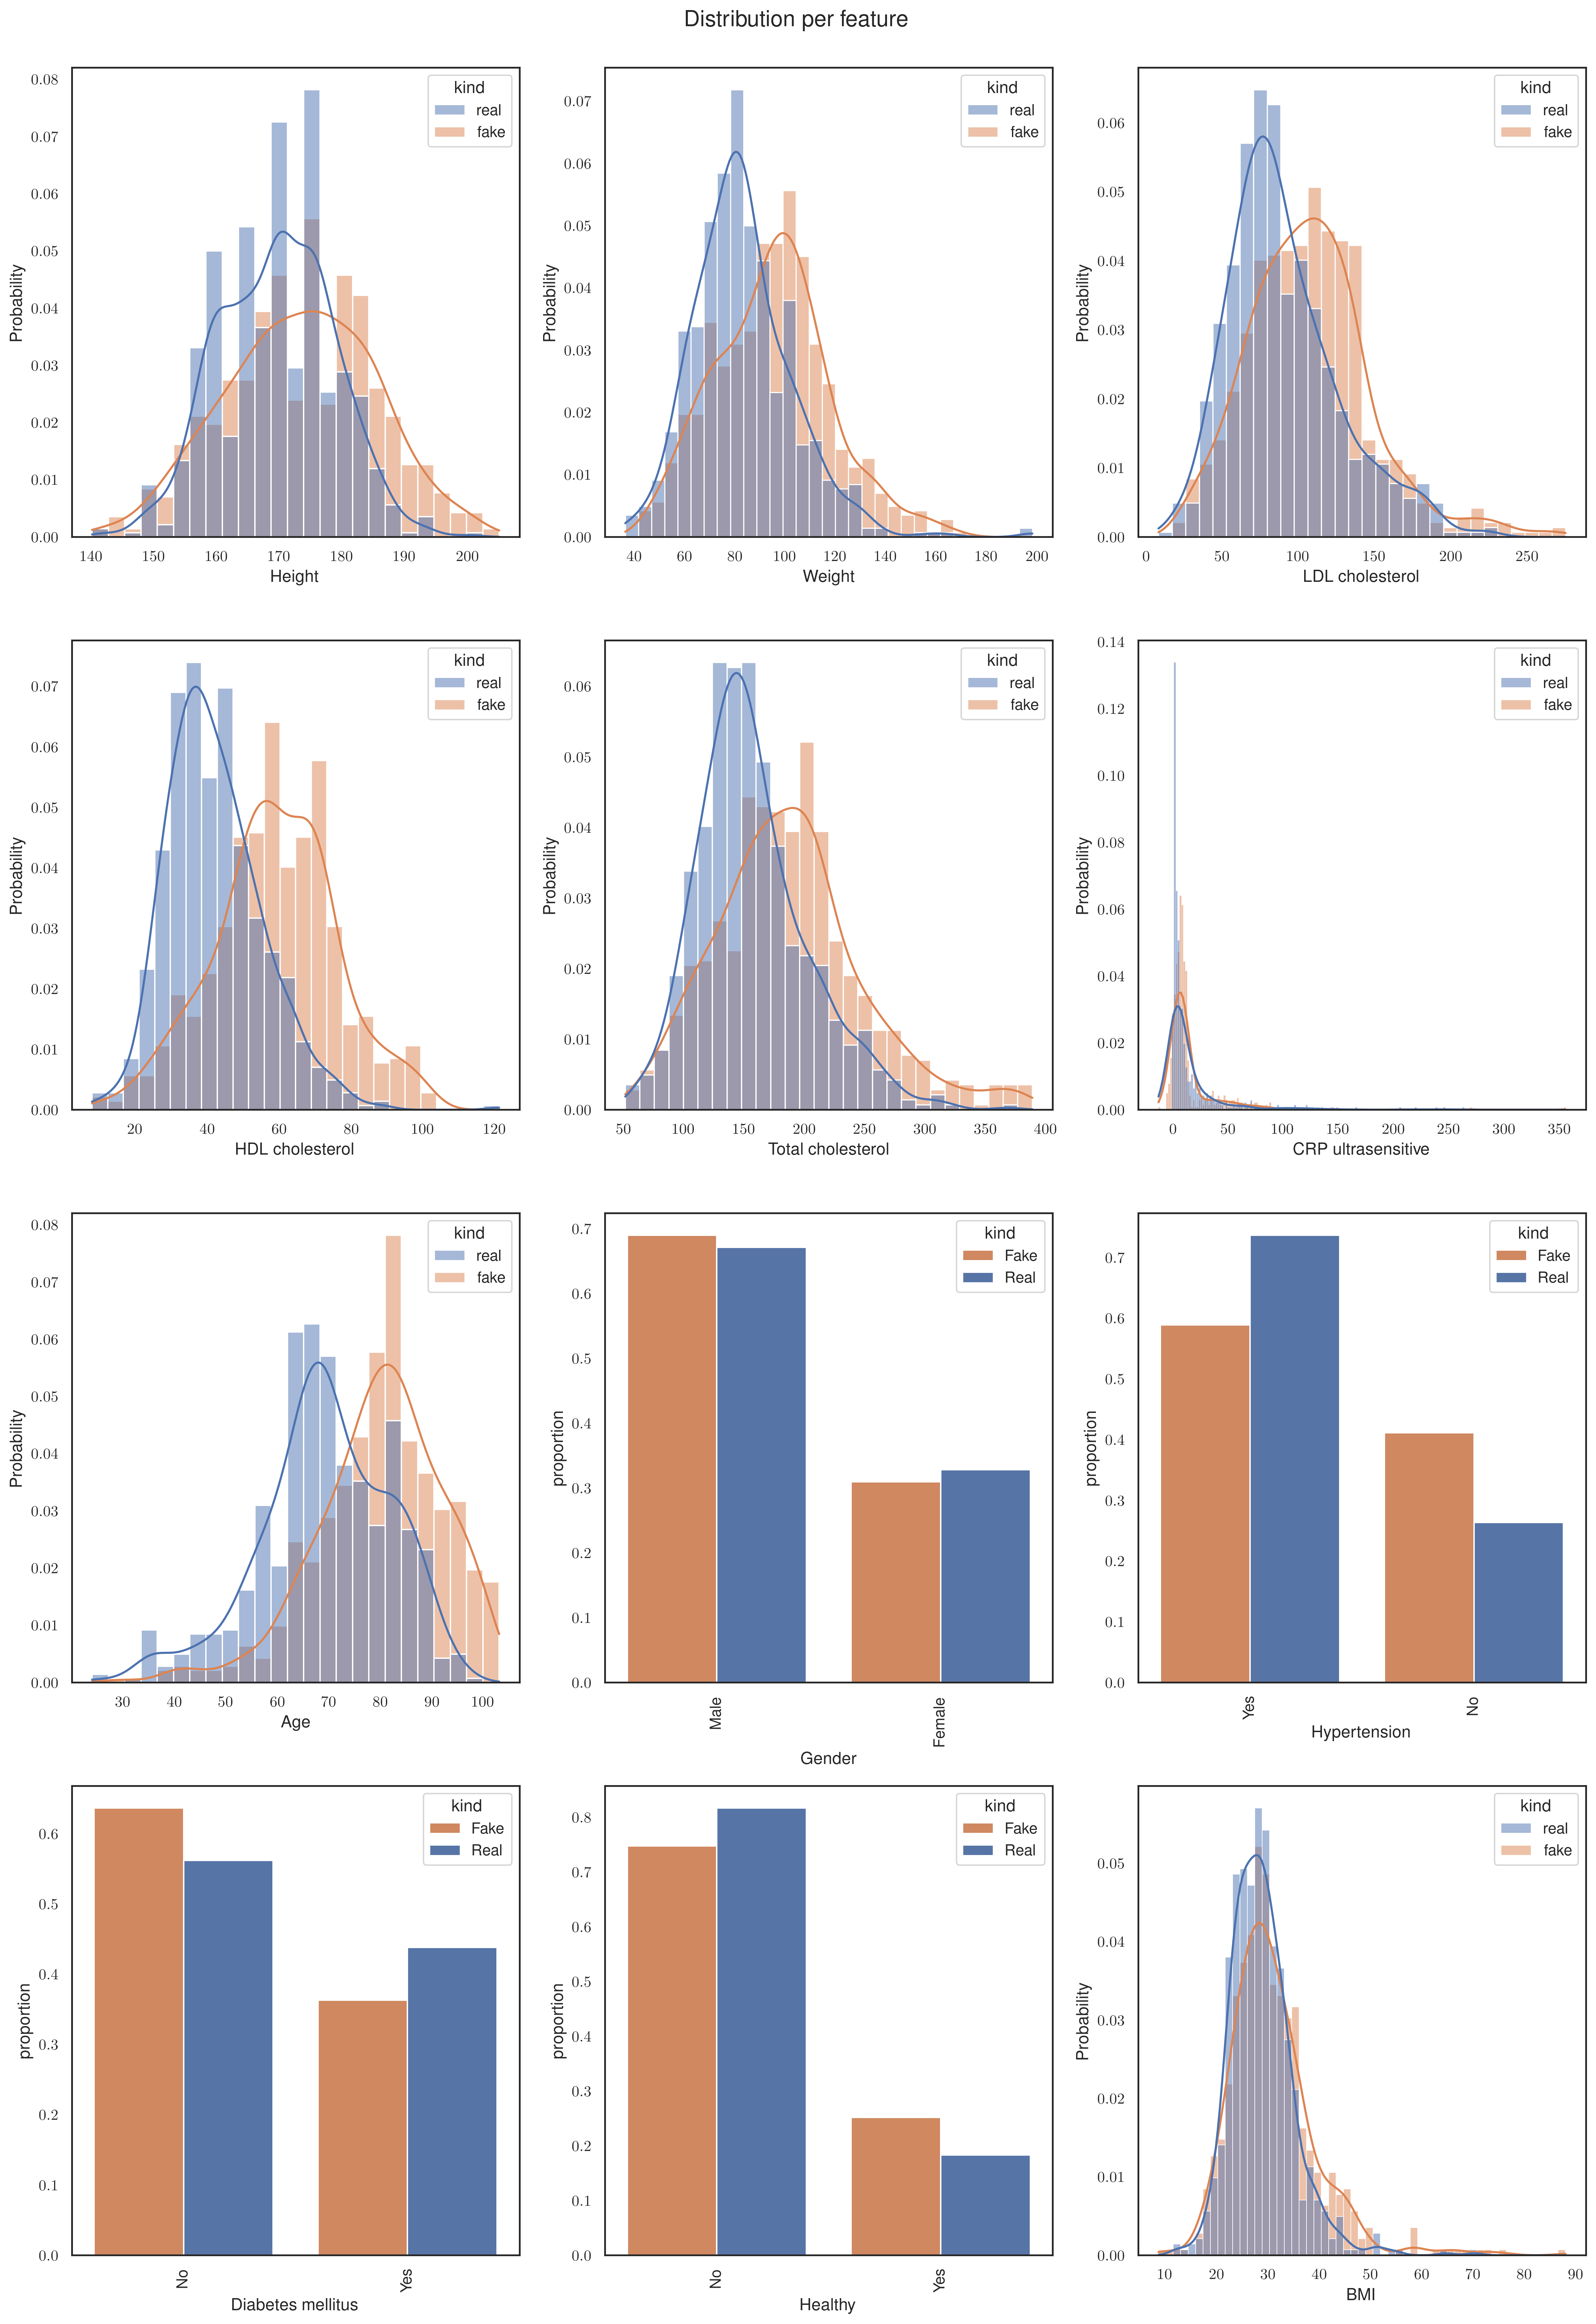

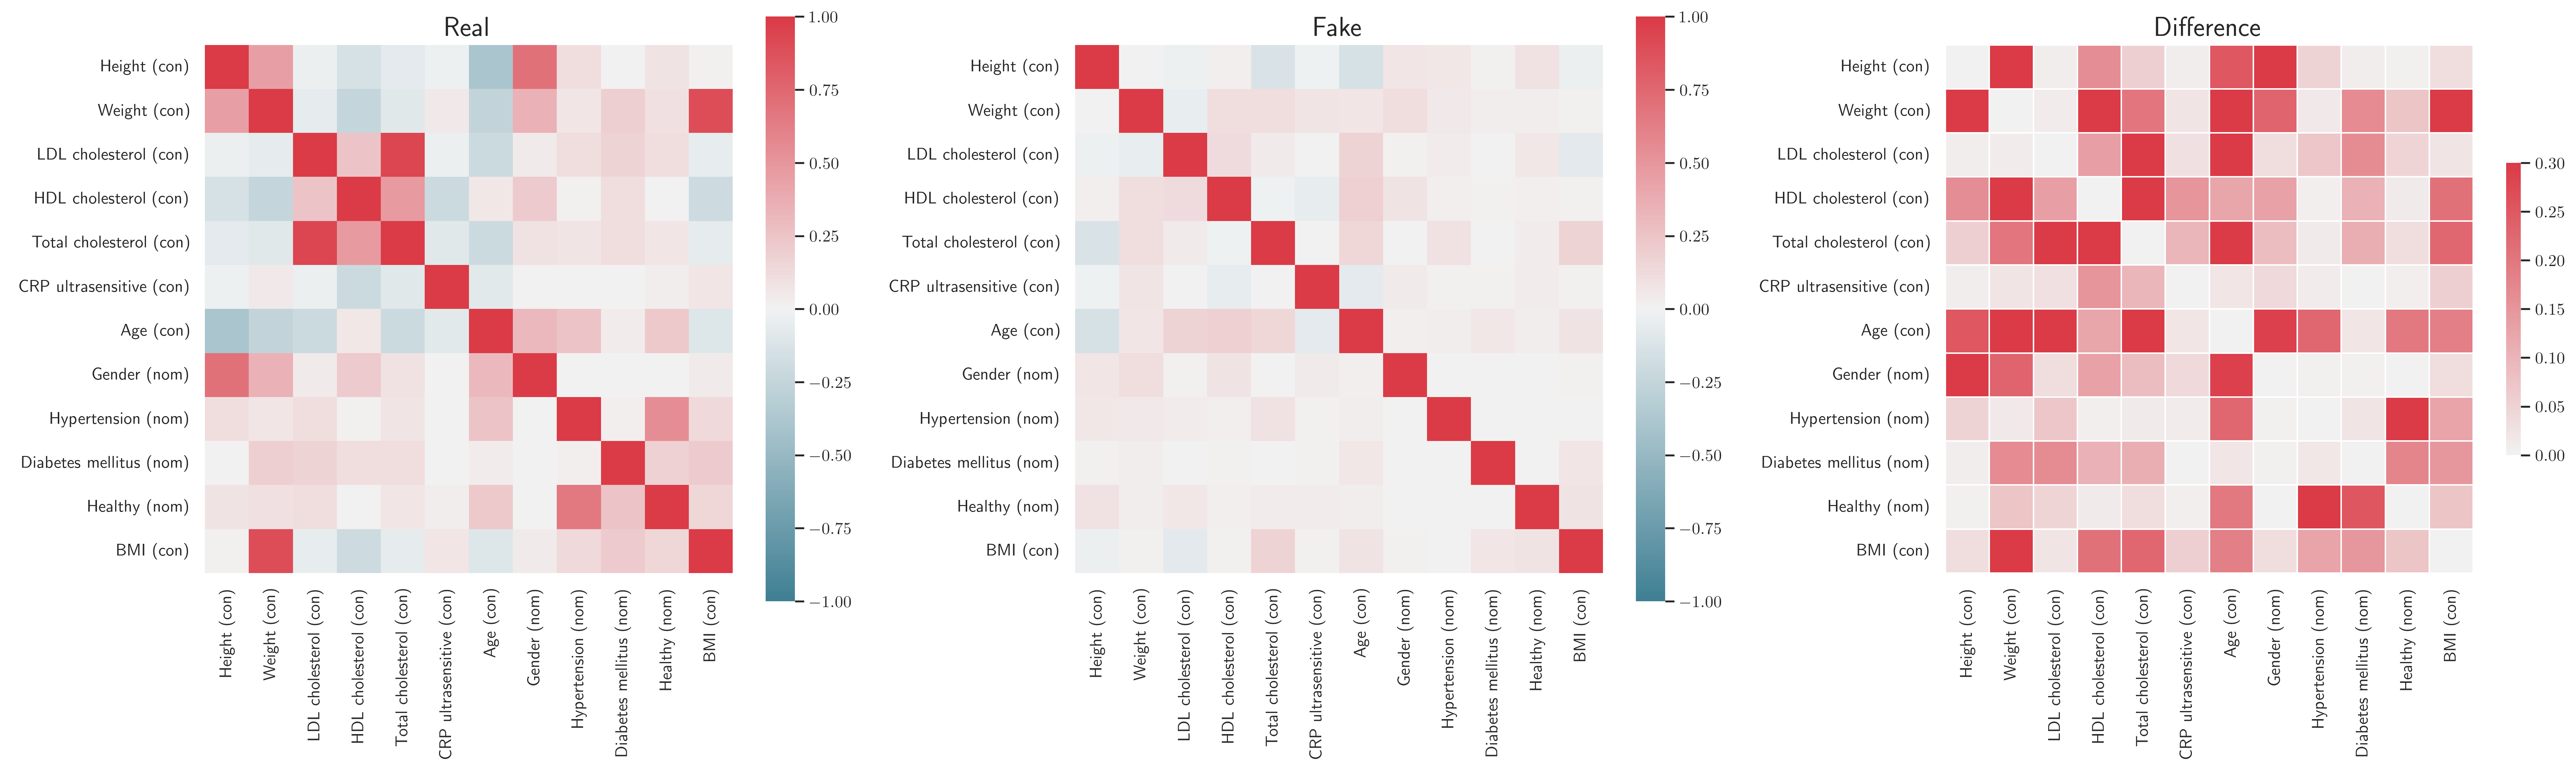

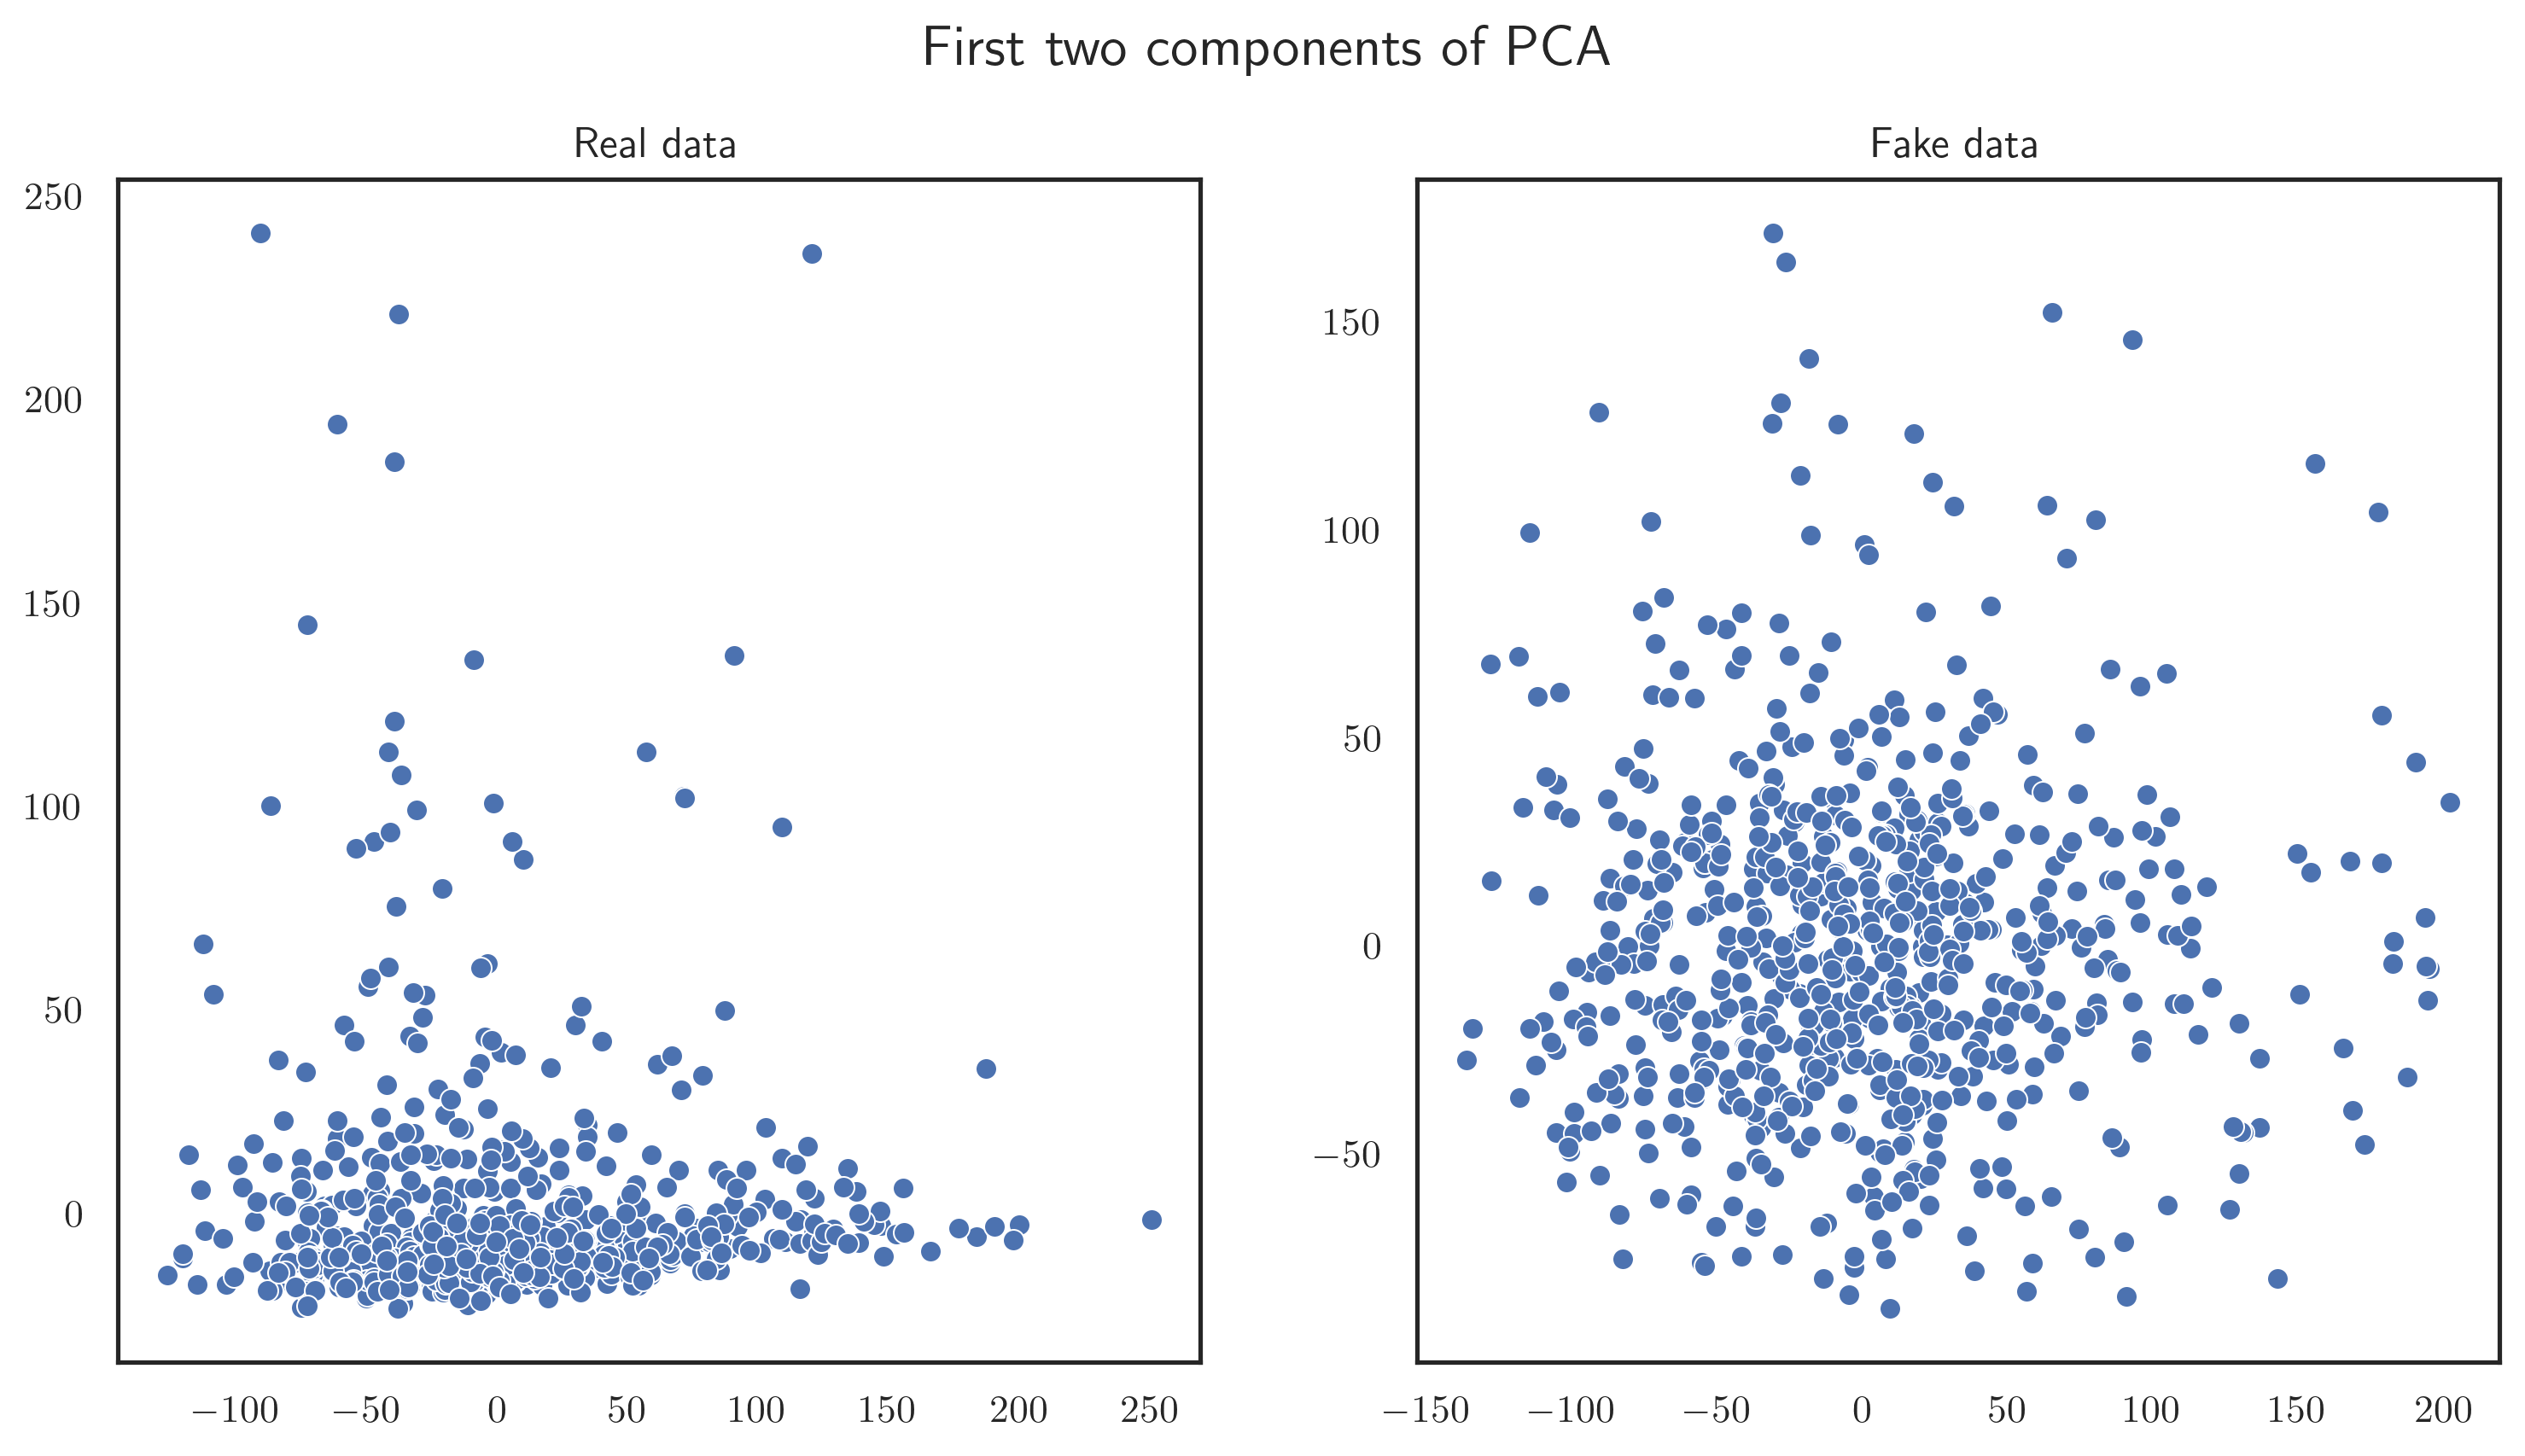

In [45]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(df_dataset, synthetic_data, cat_cols=discrete_columns)
table_evaluator.visual_evaluation()

### Correctness of generating BMI values

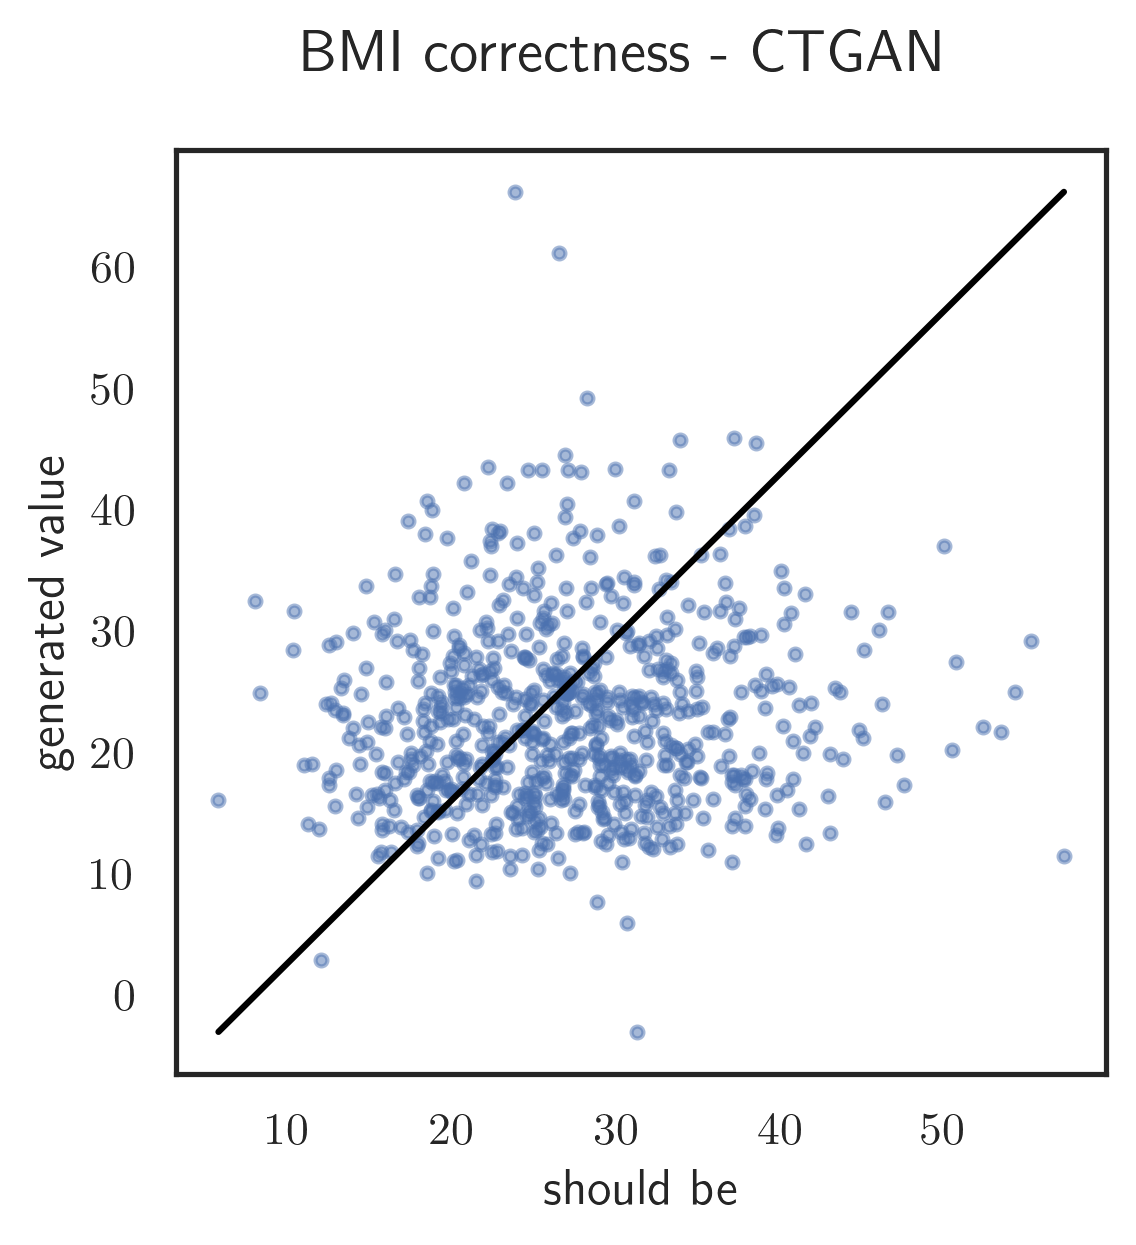

In [30]:
df_BMI_should_be = df_synthetic['Weight'] / ((df_synthetic['Height']/100)**2)

fig, ax = plt.subplots(1,1, figsize=(4,4), sharey=True)
ax.scatter(
    df_BMI_should_be,
    df_synthetic['BMI'],
    alpha=0.5, s=8
)
ax.plot(
    [df_BMI_should_be.min(), df_BMI_should_be.max()],
    [df_synthetic['BMI'].min(), df_synthetic['BMI'].max()],
    color='black'
)
ax.set_xlabel('should be')
ax.set_ylabel('generated value')
fig.suptitle('BMI correctness - CTGAN')
plt.savefig(
    f'images/9_BMI_valid_CTGAN.png',
    dpi=300,
    facecolor='white',
    bbox_inches = 'tight',
)
plt.show()

### Correctness of generating *Healthy* values

In [31]:
print(f"Correctness of generating Healthy values: \
{int(100 * sum(add_Healthy_column(df_synthetic[['Hypertension', 'Diabetes mellitus']])['Healthy'] == df_synthetic['Healthy']) / len(df_synthetic))} %")

Correctness of generating Healthy values: 63 %
